# Night Light Comparison Code
Code that gets the nightlight data from the API, and subtracts it from each other to get a difference over time

## Import the stuff

In [1]:
import requests as rq
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mlt
from datetime import date, timedelta
import xarray as xr
import copy as cp

from PIL import Image
from io import BytesIO

## Function to access API

[Link to example of API](https://8ib71h0627.execute-api.us-east-1.amazonaws.com/v1/9/82/198@3x?url=s3://covid-eo-data/bmhd_30m_monthly/BMHD_VNP46A2_sf_202003_cog.tif&bidx=1&rescale=0,255&color_map=inferno)

<Response [200]>


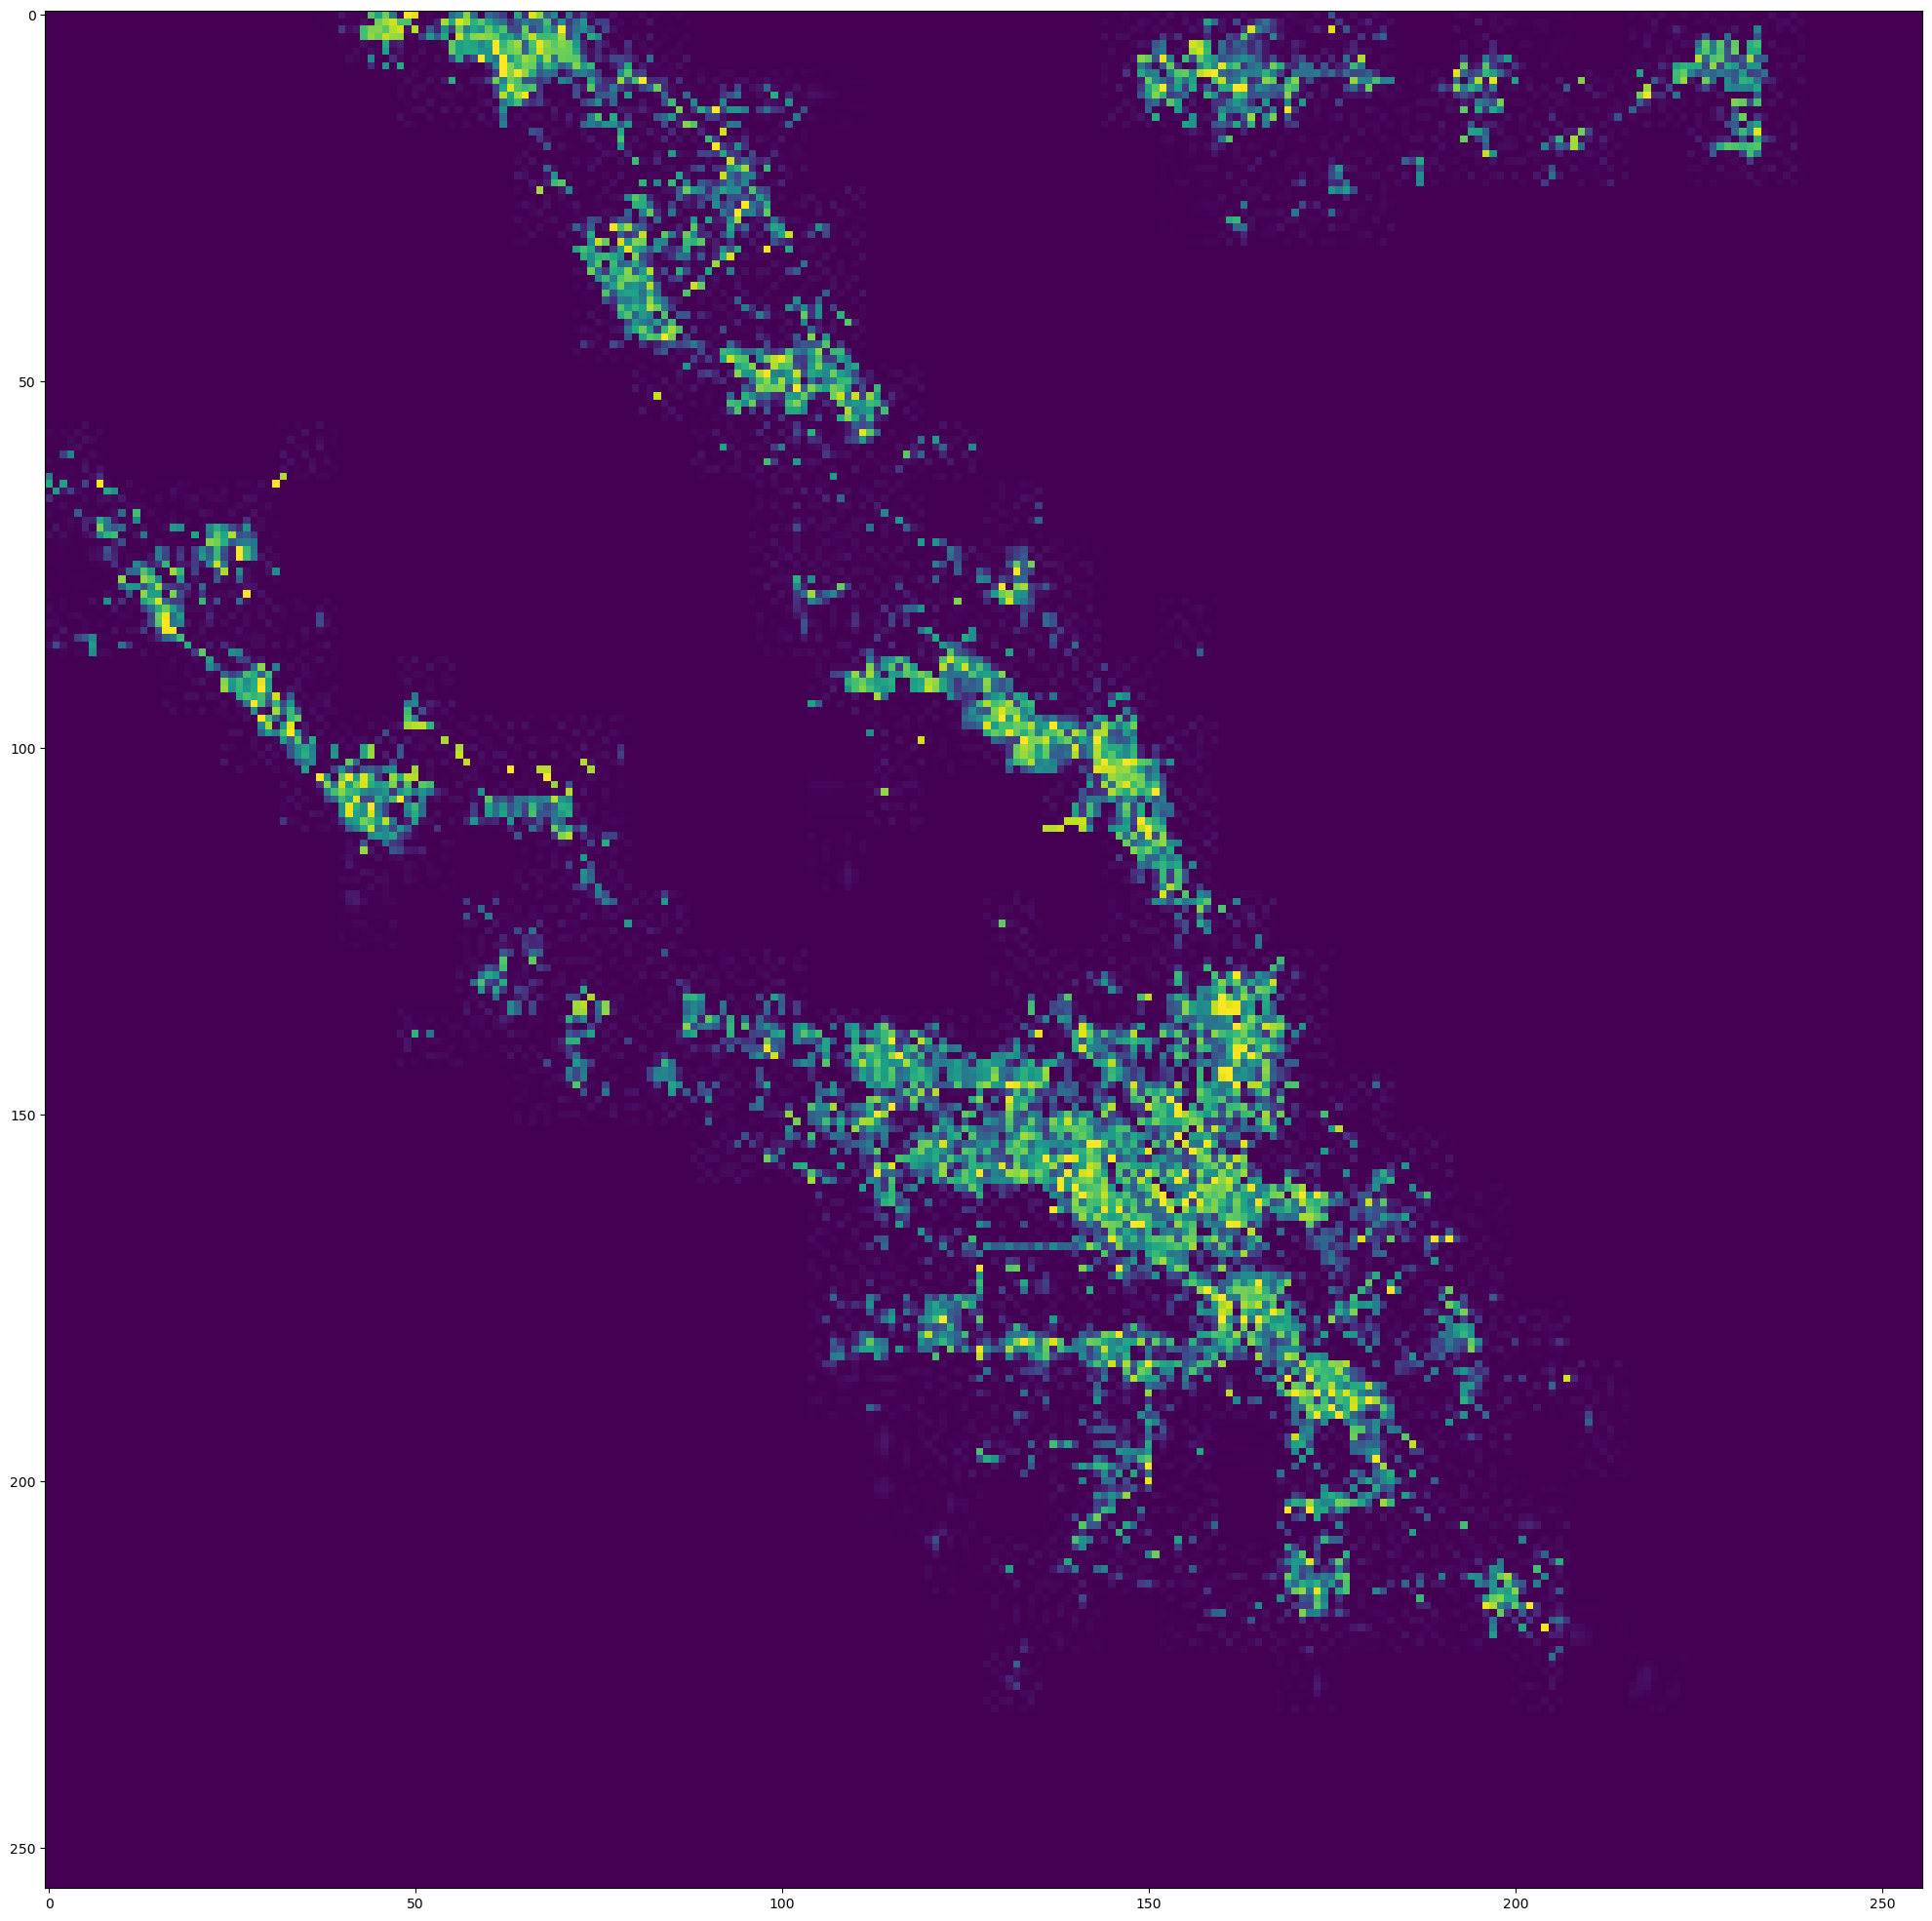

In [30]:
# API_url           = 'https://8ib71h0627.execute-api.us-east-1.amazonaws.com/v1/9/82/198@3x?url=s3://covid-eo-data/bmhd_30m_monthly/BMHD_VNP46A2_sf_202003_cog.tif&bidx=1&rescale=0,255&color_map=inferno'

API_execute       = 'https://8ib71h0627.execute-api.us-east-1.amazonaws.com/v1'

API_zoom          = '9'

tileLoc_x_examp   =  '82'
tileLoc_Y_examp   =  '198' 

API_execute_2     = '@1x?url=s3://covid-eo-data/bmhd_30m_monthly/BMHD_VNP46A2_sf_'

dateReq_examp     = '202003'

API_execute_3     = '_cog.tif&bidx=1&rescale=0,255'

def singleTileSingleDate(dateReq, tileLoc):
    '''
    Function to get a specific tile through the API
    Takes the desired date as input
    dateReq format = 'YEARMONTH' ex: 202003
    as well as the tileLoc using their weird coordinate system
    tileLoc format = '82/198'
    Returns the image
    '''
    
    # Generate URL using required data
    url           = API_execute + '/' + API_zoom + '/' + tileLoc + API_execute_2 + dateReq + API_execute_3

    # Get response
    resp = rq.get(url)
    print(resp)

    # Convert to image object
    im = Image.open(BytesIO(resp.content))

    return im

a = singleTileSingleDate('202001', '82/198')

plt.imshow(a)
plt.show()

# Custom ColorMap


In [3]:
# create colormap
# ---------------

# create a colormap that consists of
# - 1/5 : custom colormap, ranging from white to the first color of the colormap
# - 4/5 : existing colormap

# set upper part: 4 * 256/4 entries
upper = mlt.cm.inferno(np.arange(256))

# set lower part: 1 * 256/4 entries
# - initialize all entries to 1 to make sure that the alpha channel (4th column) is 1
lower = np.ones((int(256/2),4))
# - modify the first three columns (RGB):
#   range linearly between white (1,1,1) and the first color of the upper colormap
for i in range(3):
  lower[:,i] = np.linspace(1, upper[0,i], lower.shape[0])

# combine parts of colormap
cmap = np.vstack(( lower, upper ))

# convert to matplotlib colormap
cmap = mlt.colors.ListedColormap(cmap, name='myColorMap', N=cmap.shape[0])

## Subtraction Function

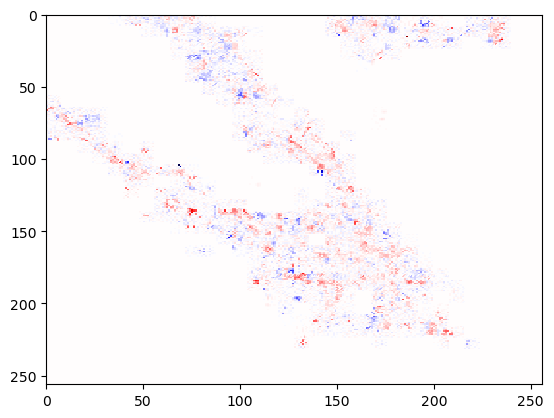

In [4]:
def subtractImg(im1, im2):
    '''
    Subtracts the values of two images of the same size such that they can be
    compared. Subtracts im1 from im2
    Inputs are two image objects, outputs a single one
    '''

    # Convert to numpy arrays
    im1Arr = np.asarray(im1).astype(int)
    im2Arr = np.asarray(im2).astype(int)

    diffArr = im2Arr - im1Arr
    #diffArr[diffArr<0] = 0
    return diffArr

a = singleTileSingleDate('202001', '82/198')
b = singleTileSingleDate('202101', '82/198')
c_Arr = subtractImg(a, b)
#c_Arr = Image.fromarray(c_Arr.astype(int),'RBG')

plt.pcolor(c_Arr,vmin=-255, vmax=255, cmap='seismic')
plt.gca().invert_yaxis()
plt.show()

## Mosaic Function

In [31]:
def Mosaic(im1,im2,im3,im4,im5,im6):
  '''
  plt.pyplot.imshow(im1)
  plt.pyplot.show()
  plt.pyplot.imshow(im2)
  plt.pyplot.show()
  plt.pyplot.imshow(im3)
  plt.pyplot.show()
  '''


  im1 = im1.resize((426, 426))
  im2 = im2.resize((426, 426))
  im1_size = im1.size
  im2_size = im2.size
  new_image = Image.new('RGB',(2*im1_size[0], im1_size[1]), (250,250,250))
  new_image.paste(im1,(0,0))
  new_image.paste(im2,(im1_size[0],0))

  im3 = im3.resize((426, 426))
  im4 = im4.resize((426, 426))
  im3_size = im4.size
  im4_size = im3.size
  new_image2 = Image.new('RGB',(2*im3_size[0], im3_size[1]), (250,250,250))
  new_image2.paste(im3,(0,0))
  new_image2.paste(im4,(im1_size[0],0))

  new_image3 = Image.new('RGB',(2*im3_size[0], 2*im3_size[1]), (250,250,250))
  new_image3.paste(new_image2,(0,0))
  new_image3.paste(new_image,(0,im1_size[0]))

  im5 = im5.resize((426, 426))
  im6 = im6.resize((426, 426))
  im5_size = im5.size
  im6_size = im6.size
  new_image4 = Image.new('RGB',(im5_size[0], 2*im6_size[1]), (250,250,250))
  new_image4.paste(im5,(0,0))
  new_image4.paste(im6,(0,im1_size[0]))

  new_image5 = Image.new('RGB',(3*im5_size[0], 2*im6_size[1]), (250,250,250))
  new_image5.paste(new_image3,(0,0))
  new_image5.paste(new_image4,(2*im1_size[0],0))

  merged_image = new_image5.resize((2000,2000)).convert('L')


  plt.imshow(merged_image)
  plt.show()

  return merged_image

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


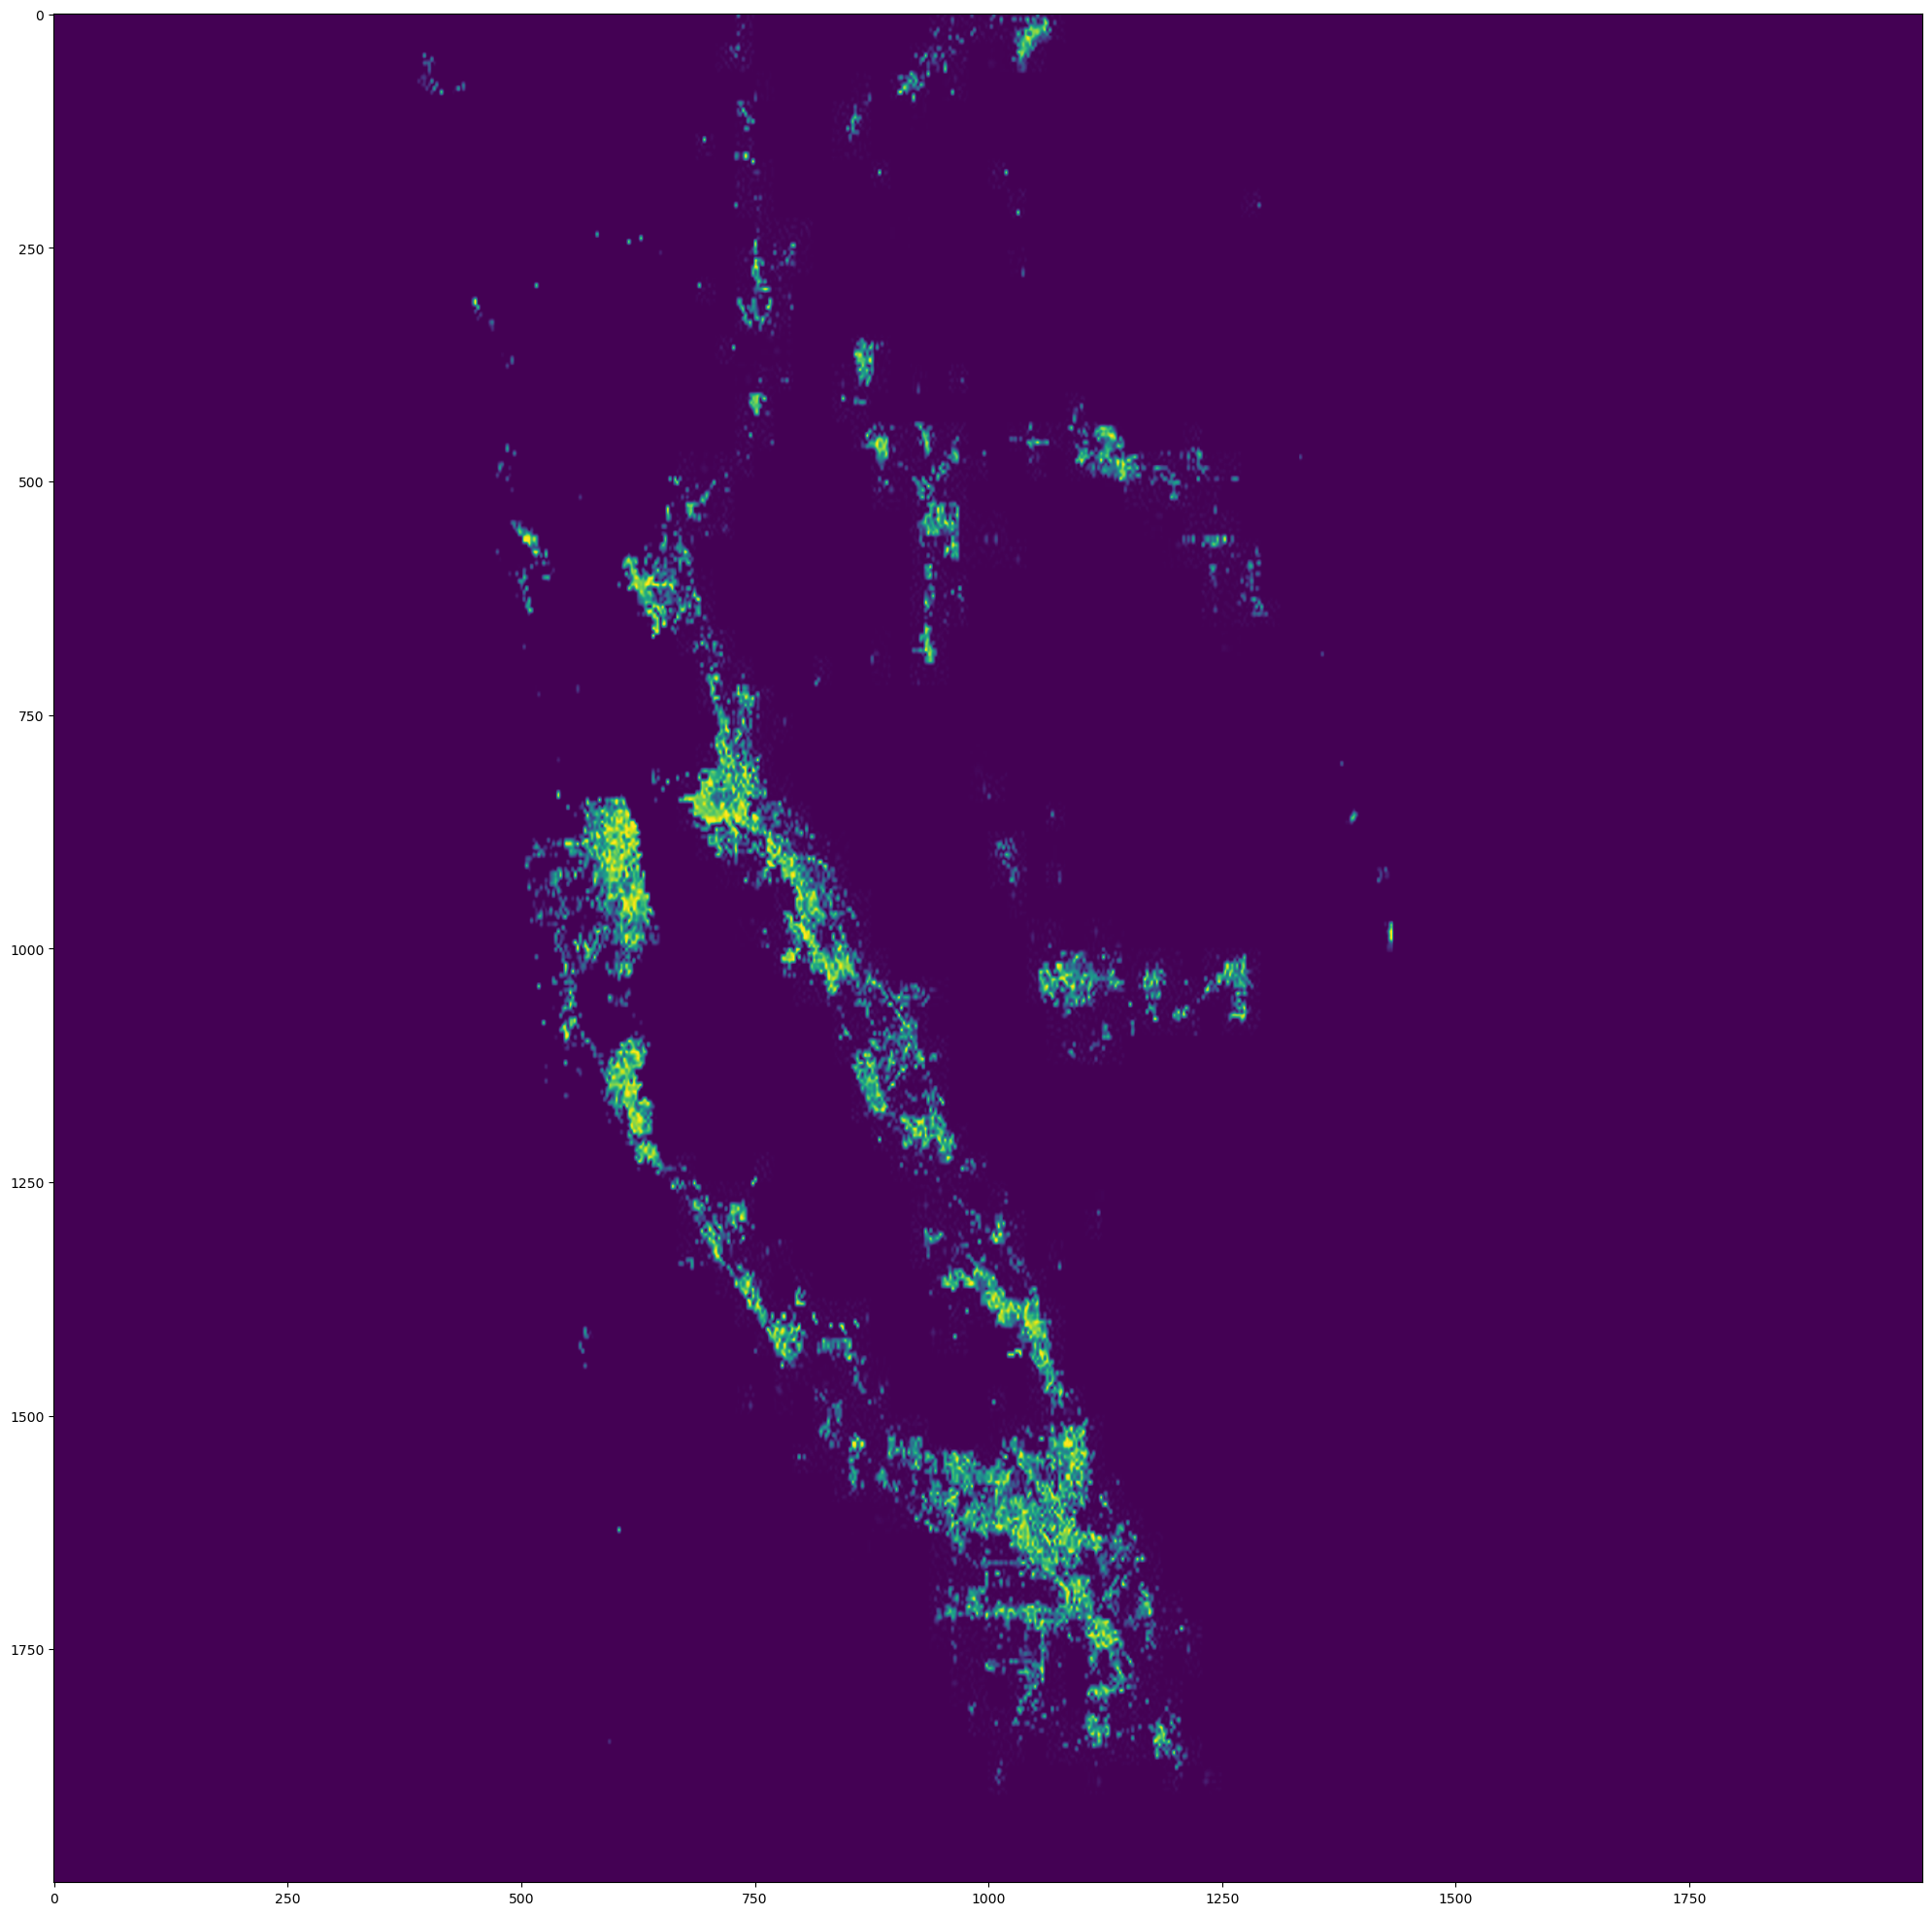

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


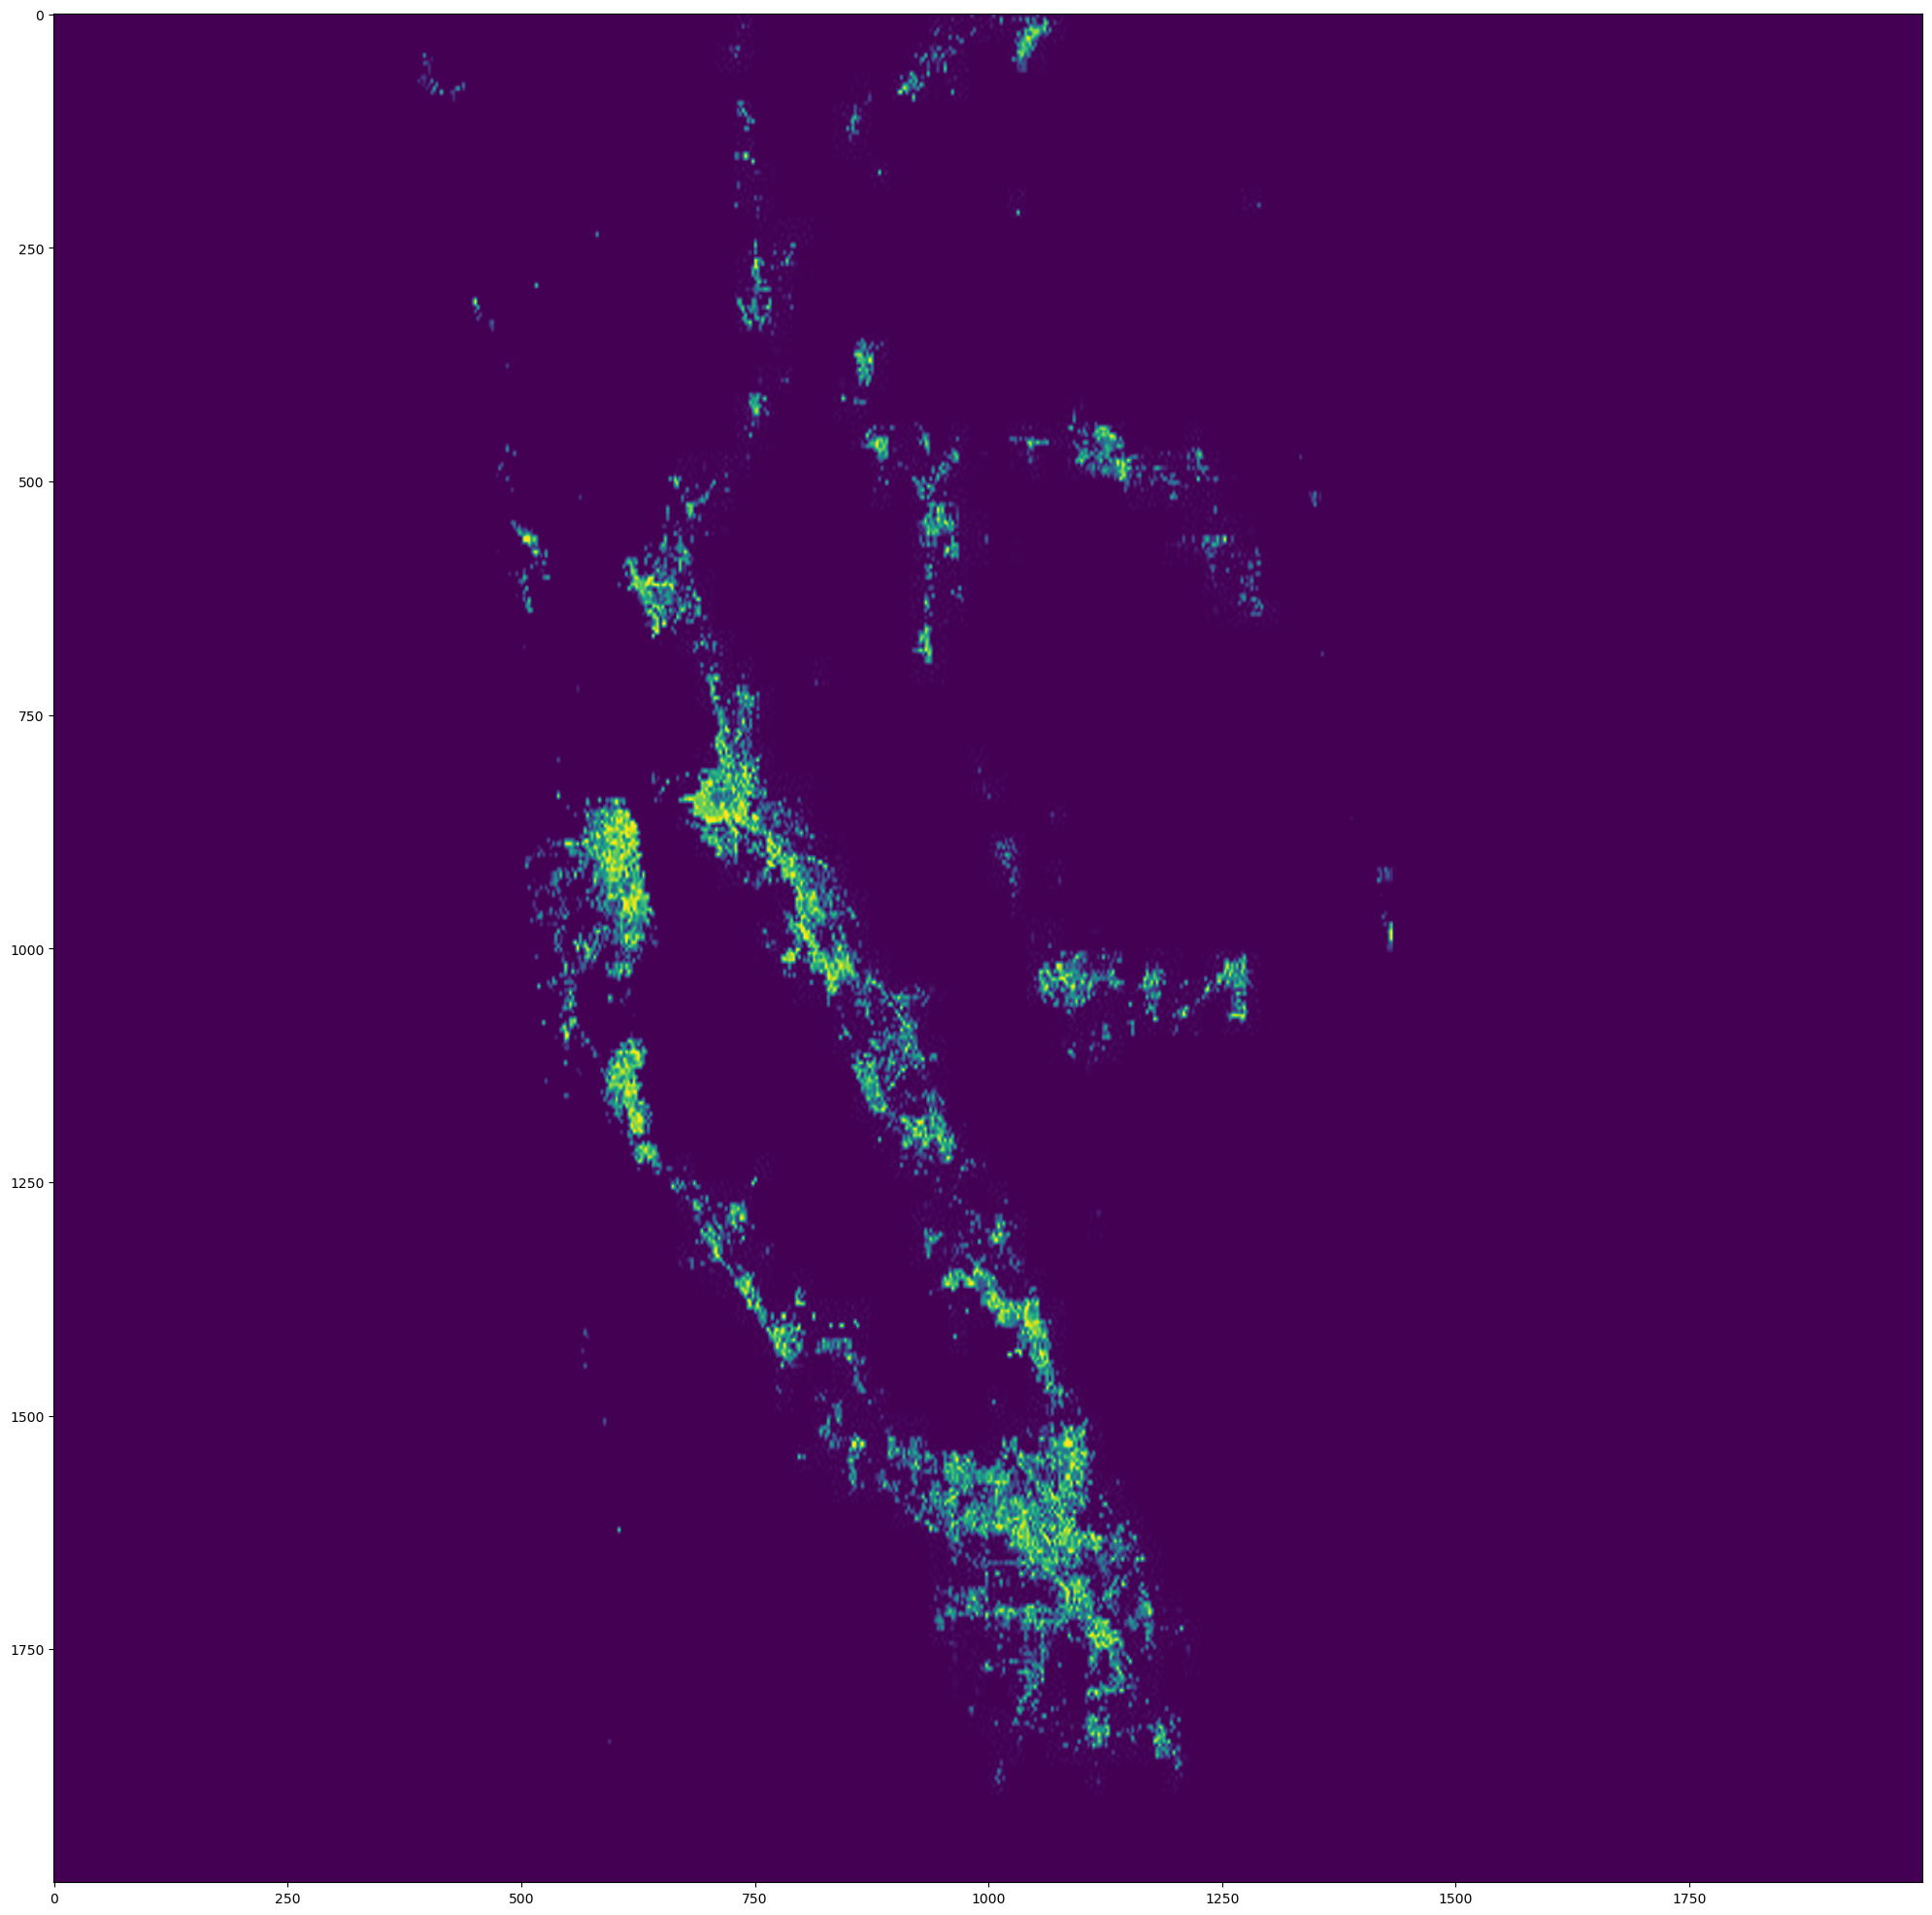

In [33]:

im1 = singleTileSingleDate('202002', '81/198')
im2 = singleTileSingleDate('202002', '82/198')

im3 = singleTileSingleDate('202002', '81/197')
im4 = singleTileSingleDate('202002', '82/197')

im5 = singleTileSingleDate('202002', '83/197')
im6 = singleTileSingleDate('202002', '83/198')

plt.rcParams["figure.figsize"] = (30,25)
merged_image1 = Mosaic(im1,im2,im3,im4,im5,im6)

im1 = singleTileSingleDate('202102', '81/198')
im2 = singleTileSingleDate('202102', '82/198')

im3 = singleTileSingleDate('202102', '81/197')
im4 = singleTileSingleDate('202102', '82/197')

im5 = singleTileSingleDate('202102', '83/197')
im6 = singleTileSingleDate('202102', '83/198')

plt.rcParams["figure.figsize"] = (30,25)
merged_image2 = Mosaic(im1,im2,im3,im4,im5,im6)


c_Arr = subtractImg(merged_image1, merged_image2)

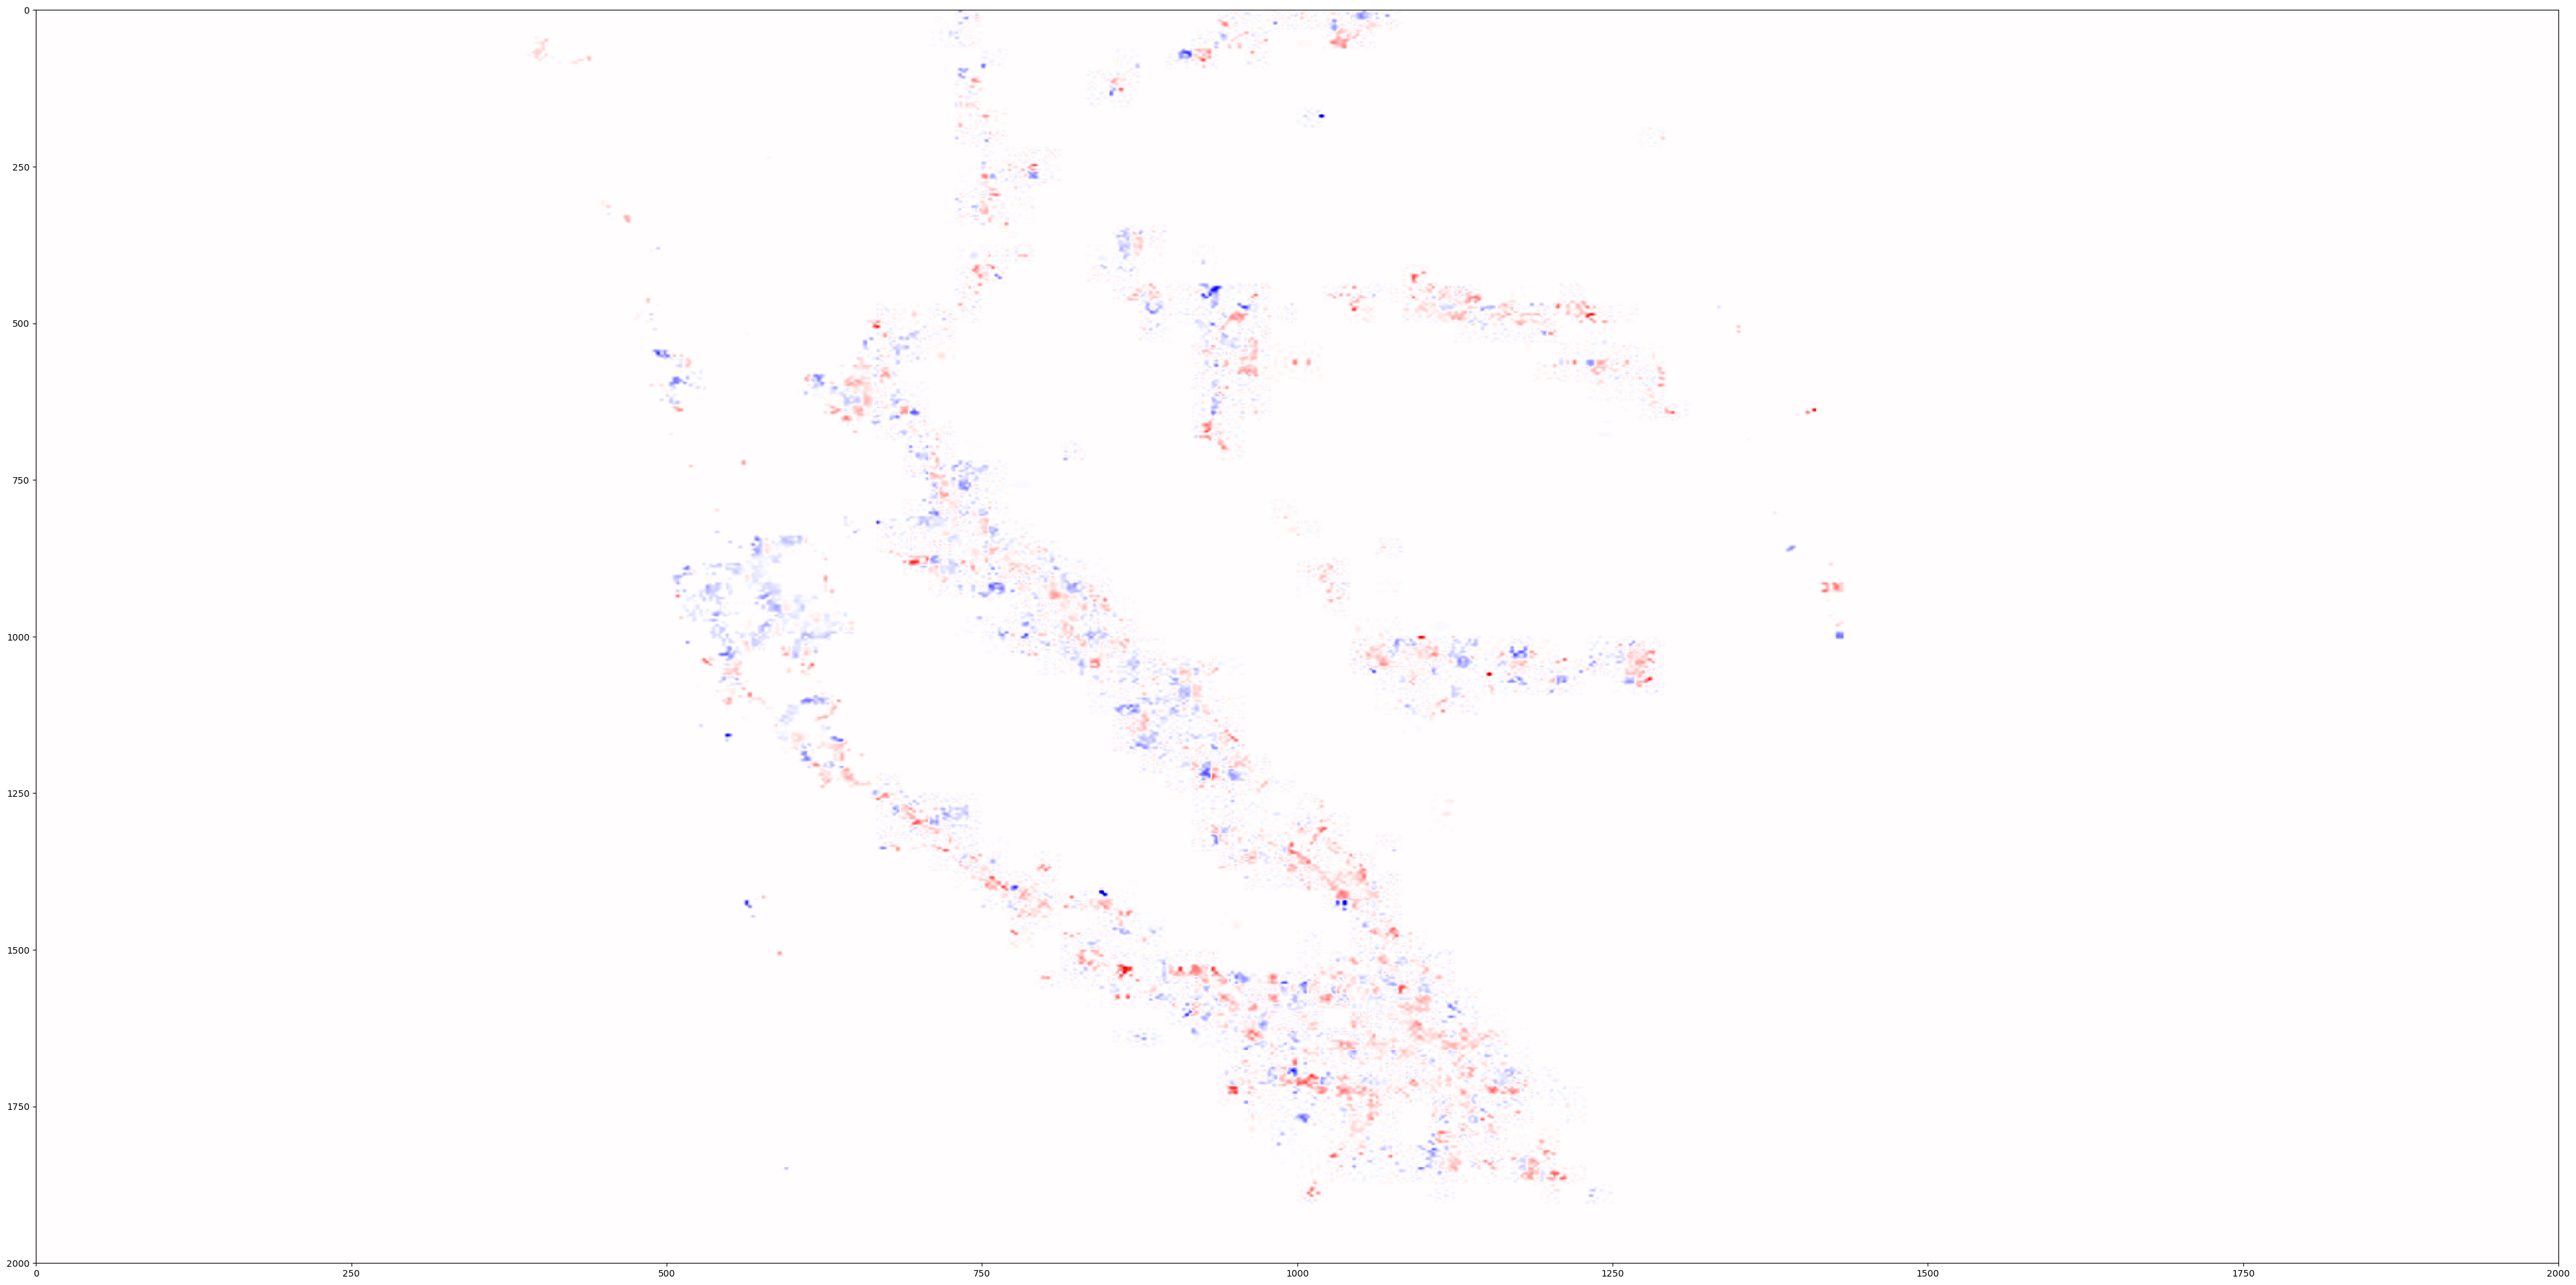

In [7]:
plt.pcolor(c_Arr,vmin=-255, vmax=255, cmap='seismic')
plt.rcParams["figure.figsize"] = (50,25)
plt.gca().invert_yaxis()
plt.show()

## Averaging Function

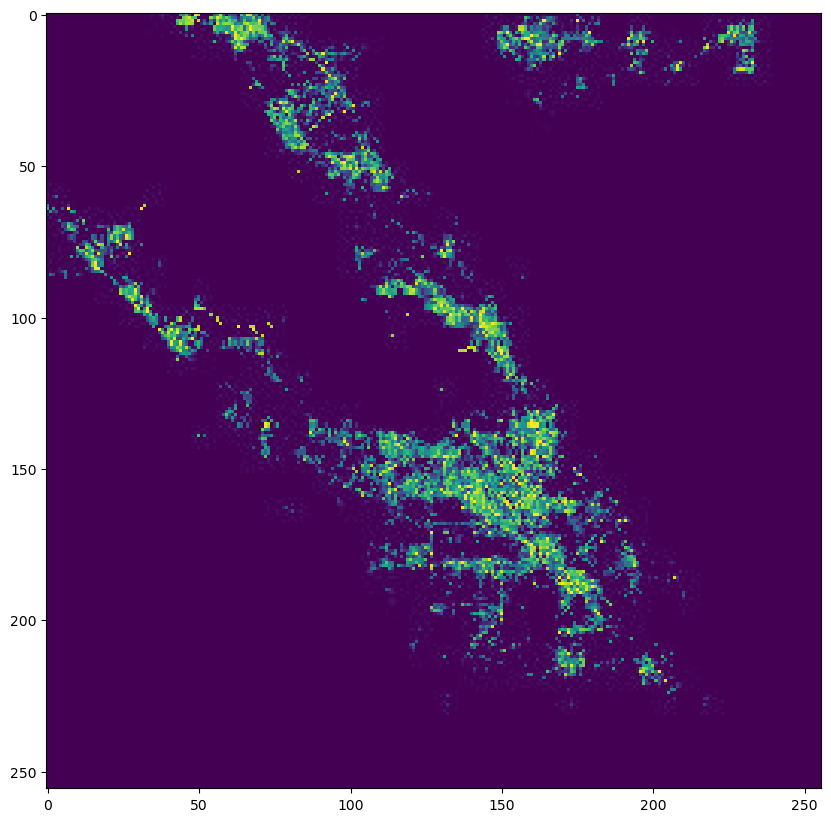

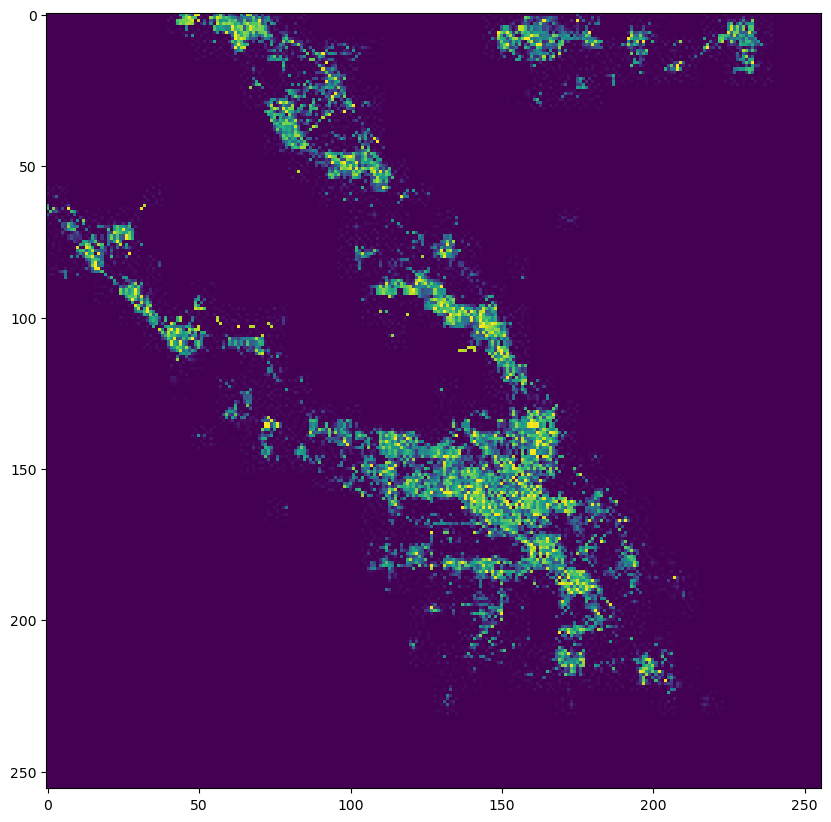

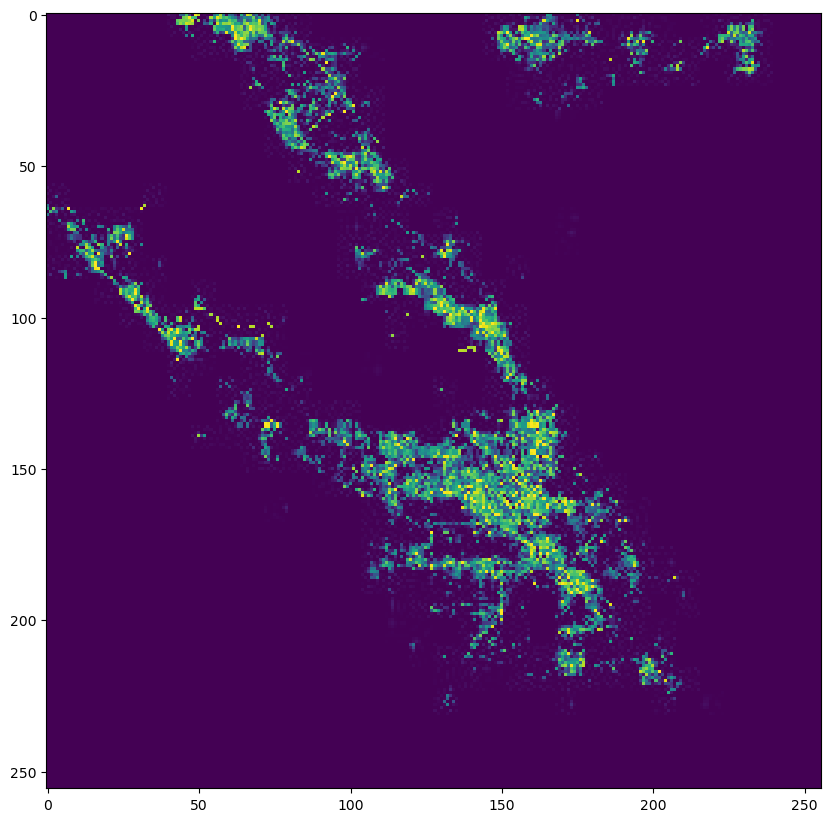

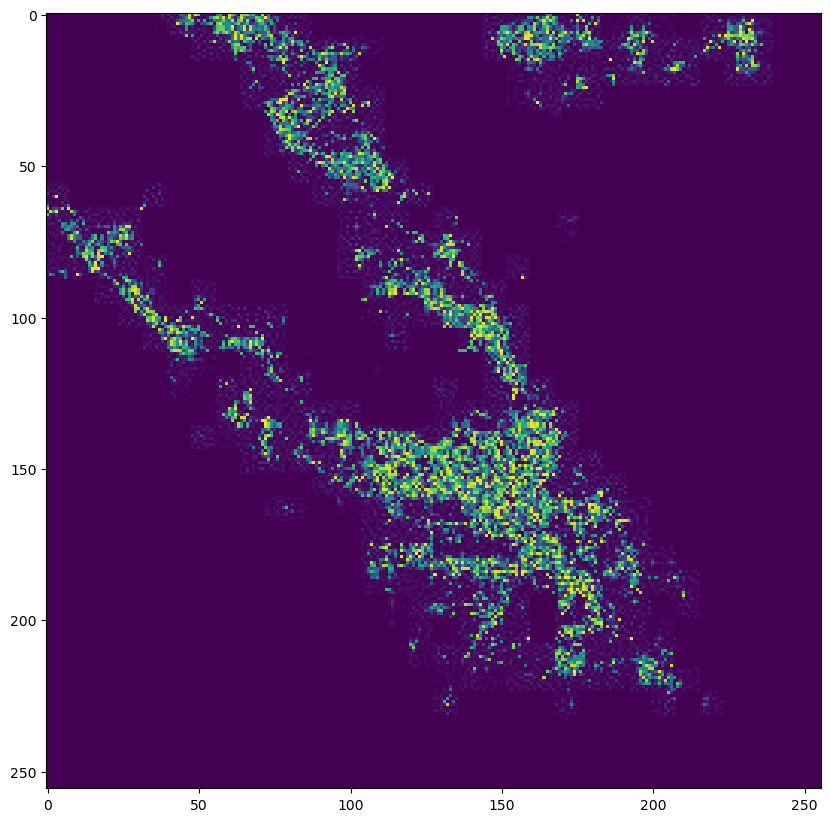

In [8]:
def averageImg(*args):
    '''
    Receive multiple images of the same size and computes
    the average value elementwise.
    Inputs are n image objects, outputs a single one
    '''
    # Convert to numpy arrays
    imgArr = []
    
    for img in args:
      imgArr.append(np.asarray(img))

    # Calculate average
    avgArr = sum(imgArr)/len(imgArr)

    # Convert back to image
    avgIm = Image.fromarray(avgArr)

    return avgArr


a = singleTileSingleDate('202003', '82/198')
b = singleTileSingleDate('202006', '82/198')
c = singleTileSingleDate('202103', '82/198')

d = averageImg(a, b, c)

plt.rcParams["figure.figsize"] = (10,25)
plt.imshow(a)
plt.show()

plt.imshow(b)
plt.show()
plt.imshow(c)
plt.show()
plt.imshow(d)
plt.show()